loading in
https://medium.datadriveninvestor.com/load-in-image-classification-data-e2dfec6dfcb6



https://www.youtube.com/watch?v=BqgTU7_cBnk&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=4


In [4]:
!pip3 install opencv-python


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


In [6]:
DATADIR = "/Users/glennhubbard/Desktop/Senior/ds440/Cats_Dogs_Torch/train"
CATEGORIES = ['dogs', 'cats']

In [7]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) 

In [8]:
IMG_SIZE = 100


In [9]:


training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for image in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path,image))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                print(str(e))
create_training_data()


OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [10]:
print(len(training_data))

23996


In [11]:
count_cats = 0
count_dogs = 0 
for image in training_data:
    if image[1] == 0:
        count_cats += 1
    else:
         count_dogs +=1
print('Cats:', count_cats, 'Dogs:', count_dogs)

Cats: 11998 Dogs: 11998


In [12]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

import pickle
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

In [13]:
from venv import create
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle



X = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))
y = np.array(y)
X = X/225.0



model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu")) 


model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3)))
model.add(Activation("relu")) #rectified linear
model.add(MaxPooling2D(pool_size=(2,2)))
            
model.add(Flatten())

model.add(Dense(4))
model.add(Activation("relu")) #rectified linear

model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
                                optimizer="adam",
                                metrics=['accuracy'])
model.fit(X,y, epochs=1, batch_size=64, validation_split=.2)


300/300 [==============================] - 138s 454ms/step - loss: 0.5892 - accuracy: 0.6822 - val_loss: 0.7186 - val_accuracy: 0.6902


In [14]:
model.save("CATS_DOGS_OCT19.model")


INFO:tensorflow:Assets written to: CATS_DOGS_OCT19.model/assets


INFO:tensorflow:Assets written to: CATS_DOGS_OCT19.model/assets


testing

https://stackoverflow.com/questions/49793018/how-to-test-a-trained-model-using-tensorflow-for-image-classification

https://www.kaggle.com/code/drrajkulkarni/cats-dogs-convnet-pytorch

https://www.kaggle.com/code/ahmedtarek26/cats-vs-dogs-cnn-model

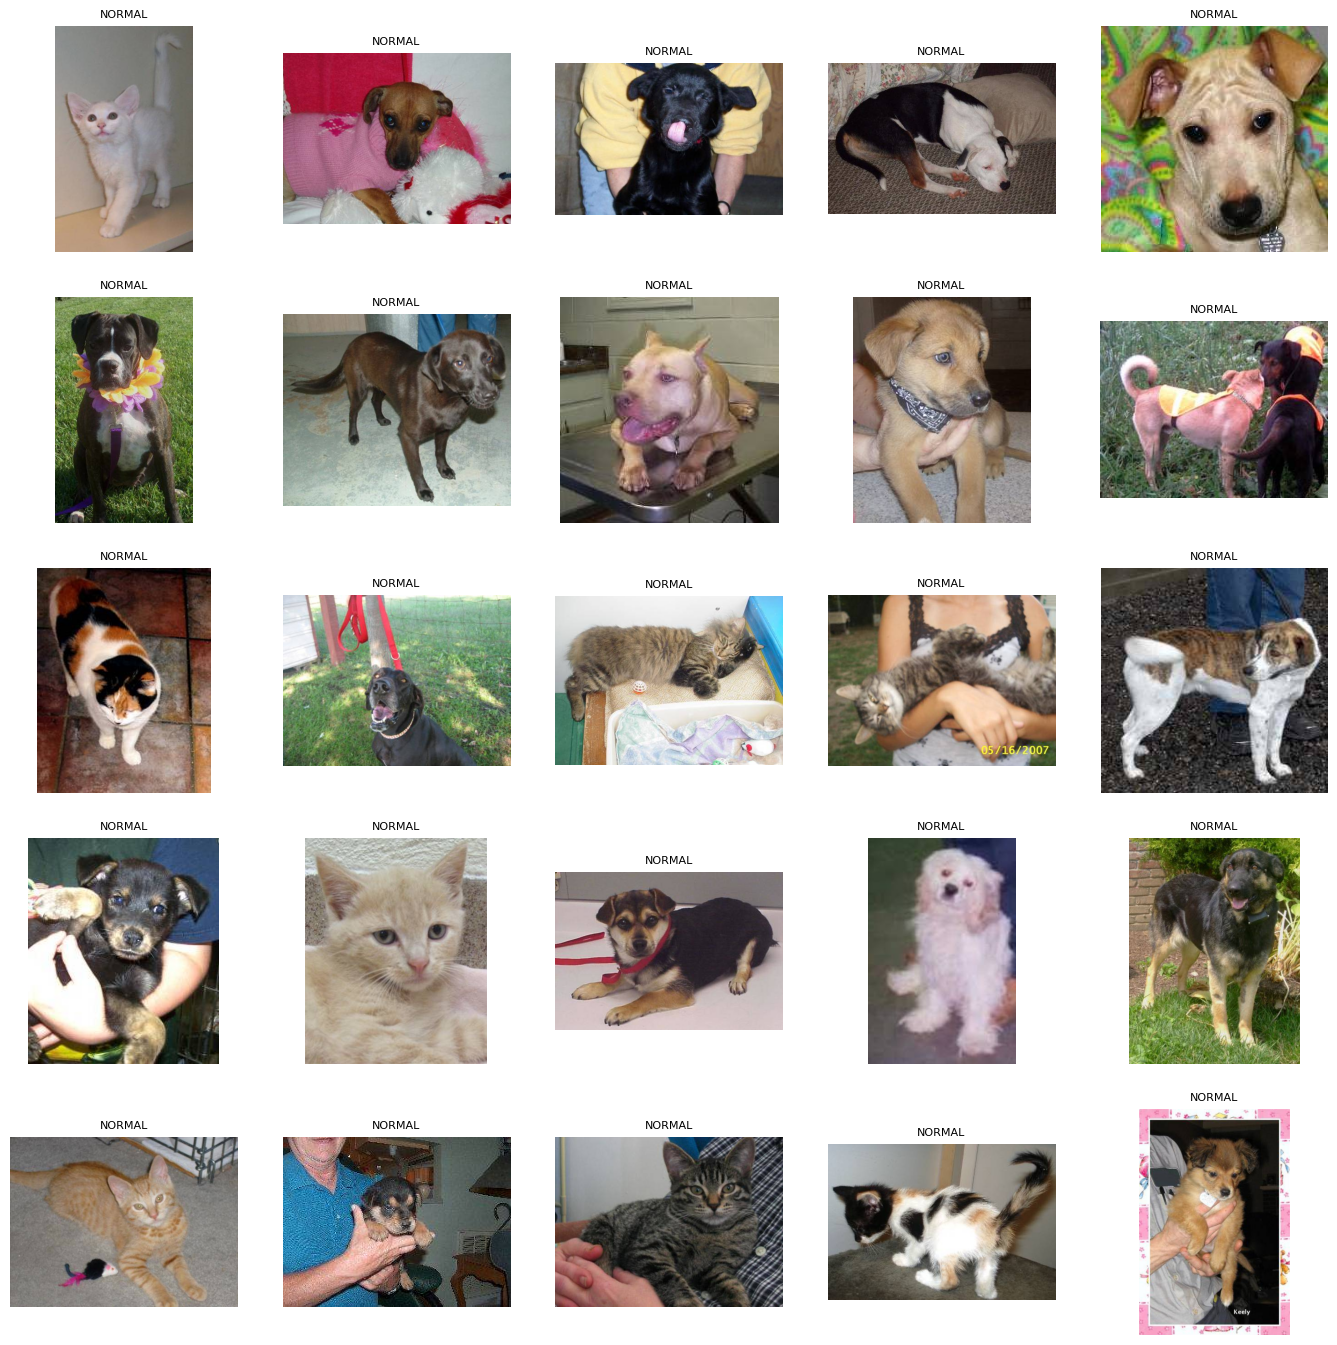

In [15]:

W = 5
H = 5
fig, ax = plt.subplots(W, H, figsize = (17,17))
DATADIR="/Users/glennhubbard/Desktop/Senior/ds440/Cats_Dogs_Torch/test"
import random

ax = ax.ravel() # flaten the matrix into array
for i in np.arange(0, W * H): 
    label ='NORMAL'
    class_dir = os.path.join(DATADIR)
    # Select a random image
    image = random.choice(os.listdir(class_dir))
    # read and display an image with the selected index    
    img = plt.imread(os.path.join(class_dir,image))
    ax[i].imshow( img )
    ax[i].set_title(label, fontsize = 8) # the label
    ax[i].axis('off')

In [16]:
!pip3 install keras.applications.resnet50

ERROR: Could not find a version that satisfies the requirement keras.applications.resnet50 (from versions: none)
ERROR: No matching distribution found for keras.applications.resnet50

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


https://thedatafrog.com/en/articles/dogs-vs-cats/
model = tf.keras.models.load_model("CATS_DOGS_OCT19.model")


1/1 [==============================] - 1s 891ms/step
Predicted: [('n02093428', 'American_Staffordshire_terrier', 0.59133387)]


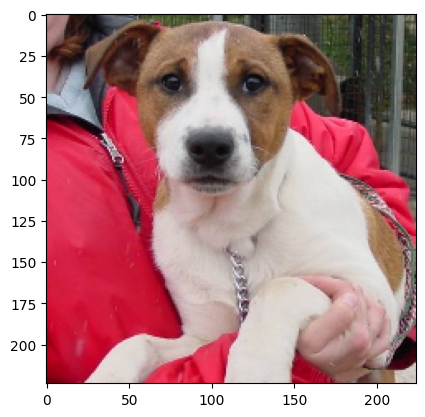

In [17]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import keras

model2 = ResNet50(weights='imagenet')
model1 = tf.keras.models.load_model("CATS_DOGS_OCT19.model")


def evaluate(img_fname):
    img = keras.utils.load_img(img_fname, target_size=(224, 224))
    x = keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model2.predict(x)
    # print the probability and category name for the 5 categories 
    # with highest probability: 
    print('Predicted:', decode_predictions(preds, top=1)[0])
    plt.imshow(img)


evaluate('/Users/glennhubbard/Desktop/Senior/ds440/Cats_Dogs_Torch/test/21.jpg')


Below is the random iterator. Will take a random image to assess for the monitoring

https://www.geeksforgeeks.org/how-to-iterate-through-images-in-a-folder-python/

In [22]:
from ast import Not
import os
from os import listdir
import random
 
# get the path or directory
i=0
while i <10:

    random_file=random.choice(os.listdir("/Users/glennhubbard/Desktop/Senior/ds440/Cats_Dogs_Torch/test"))


  


    def evaluate(random_file):
    
        img = keras.utils.load_img(random_file, target_size=(224, 224))
        x = keras.utils.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds = model2.predict(x)
        # print the probability and category name for the 5 categories 
        # with highest probability: 
        print('Predicted:', decode_predictions(preds, top=1)[0])
    
        plt.imshow(img)

    evaluate(random_file)

    i+=1







FileNotFoundError: [Errno 2] No such file or directory: '1835.jpg'

Monitoring below this.
Loop is custom, as are implementations of the manipulations

Goals of the next week: What the loop will do.

1. Each iteration of the loop will take the testing data, and manipulate the size and grayscale of the image for now.
2. This will be done on a random basis, so as to create noise.
3. after printing out the test accuracy of 5 examples, the system will assess if the accuracy is lower than the accuracy of the training example.
4. If the accuracy is lower, it will print out--warning, warning, accuracy dropped. Introduced noise is of concern.
5. Otherwise, it will continue into the next loop, whihc will repeat the manipulation of the data, and add a new noise.

My difficulties now. I am having trouble running the testing data. It took me a really long time to get the files working for the training data, but Ive made progress.
I'm lucky to have found good online resources to faciliate this development. I don't know much about neural networks, tensorflow, or image data, so I've needed all the help I can get.

In the next week I want to finish this loop system. My progress has been slower than I thought, but I think that's because I haven't learned anything about neural networks or image data yet. In the end, I'm proud of the progress made thus far. 